<img src="../../../../images/hierarchical.png" style="background:white; display: block; margin-left: auto;margin-right: auto; width:80%"/>

---
<h2>1. Importing the Dataset</h2>

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../../../../data/clean/Mall_Customers.csv')
display(df.head())
x = df.iloc[:, [3,4]].values

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


---
<h2>2. Find The Optimal Number of Clusters with The Dendrogram</h2>

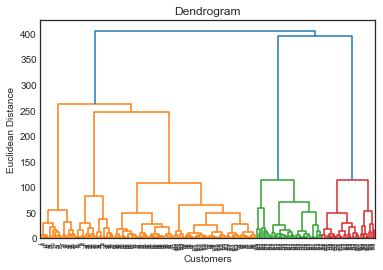

In [2]:
import scipy.cluster.hierarchy as sch
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('seaborn-white')

ddg = sch.dendrogram(sch.linkage(x, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

---
<h2>3. Training The Model on The Dataset</h2>

In [3]:
from sklearn.cluster import AgglomerativeClustering

hac = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
y_kmeans = hac.fit_predict(x)
df_dupl = df.copy()
df_dupl["cluster"] = y_kmeans
df_dupl[['Annual Income (k$)', 'Spending Score (1-100)', 'cluster']].groupby(['cluster']).agg('mean')

,Annual Income (k$),Spending Score (1-100)
cluster,,
0,89.406250,15.593750
1,55.811765,49.129412
2,86.538462,82.128205
3,25.095238,80.047619
4,26.304348,20.913043


---
<h2>4. Visualizing The Clusters</h2>

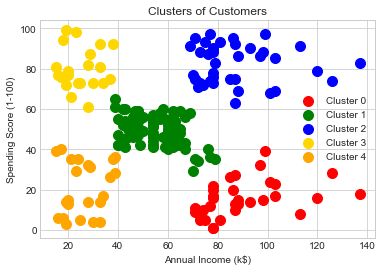

In [4]:
mpl.style.use('seaborn-whitegrid')

col = ['red', 'green', 'blue', 'gold', 'orange']

for i in range(5):
    plt.scatter(x=df_dupl[df_dupl['cluster']==i]['Annual Income (k$)'].values,
                y=df_dupl[df_dupl['cluster']==i]['Spending Score (1-100)'].values,
                s=100, c=col[i], label='Cluster '+str(i))

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of Customers')
plt.legend()
plt.show()